In [100]:
import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
if sys.path[-1] != "..": sys.path.append("..")
import model
from common import cosmology, rh_neutrino, constants, constraints
model = importlib.reload(model)
cosmo

In [2]:
def calc_effective_mass(coupling, other_field, fundermental_mass):
    return np.sqrt(fundermental_mass**2 + coupling * other_field**2)

In [43]:
def make_bg_plots(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g, **kwargs):
    sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, g=g, **kwargs)

    plt.loglog(sol.t, cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))
    plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
    plt.ylabel(r"Asymmetry, $\eta_B$")
    plt.show()

    plt.semilogx(sol.t, sol.theta, label=r"Axion, $a / a_0$")
    plt.semilogx(sol.t, sol.chi / chi0, label=r"Helper, $\chi / \chi_0$")
    plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
    plt.ylabel(r"Normalized Field Value")
    plt.legend()
    plt.show()

    sigma_eff = rh_neutrino.paper_sigma_eff
    plt.loglog(sol.t, rh_neutrino.calc_Gamma_L(sol.T, sigma_eff))
    plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
    plt.ylabel(r"Lepton Rate, $\Gamma_L / \mathrm{GeV}$")
    plt.show()

    plt.loglog(sol.t, sol.H, label=r"Hubble Parameter, $H$")
    la, = plt.loglog(sol.t, calc_effective_mass(g, sol.chi, m_a), label=r"Eff. Axion Mass, $m_\mathrm{a,eff}$")
    lh, = plt.loglog(sol.t, calc_effective_mass(g, f_a * sol.theta, m_chi), 
               label=r"Eff. Helper Field Mass, $m_\mathrm{\chi,eff}$")
    plt.axhline(m_a, color=la.get_color(), ls="--", label="Fund. Axion Mass")
    plt.axhline(m_chi, color=lh.get_color(), ls="--", label=r"Fund. $\chi$ Mass")
    plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
    plt.ylabel("Energy / GeV")
    plt.legend()
    plt.show()
    
    return sol

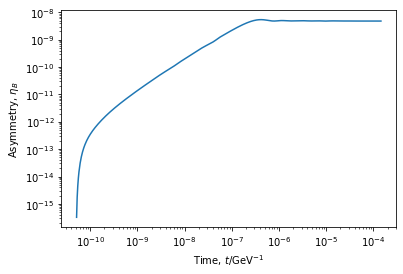

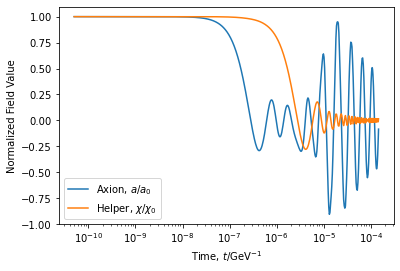

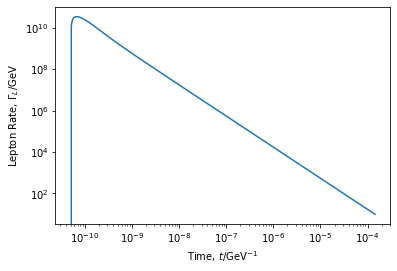

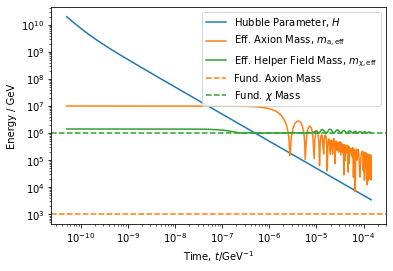

In [21]:
make_bg_plots(m_a=1e3, f_a=1e6, Gamma_phi=3e10, H_inf=2e10, chi0=1e7, m_chi=1e6, g=1.0);

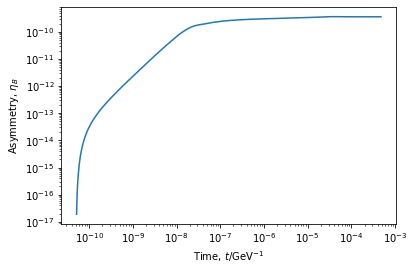

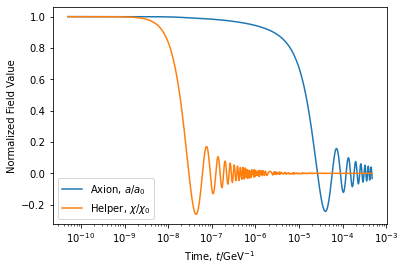

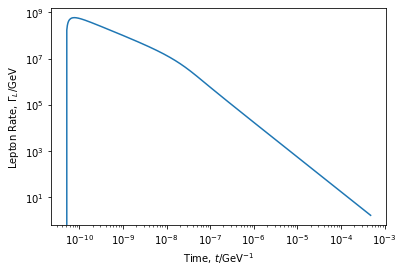

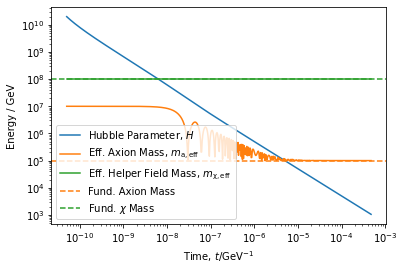

In [6]:
make_bg_plots(m_a=1e5, f_a=1e6, Gamma_phi=1e8, H_inf=2e10, chi0=1e7, m_chi=1e8, g=1.0);

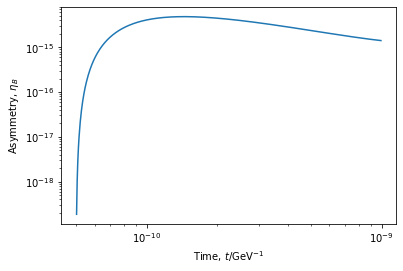

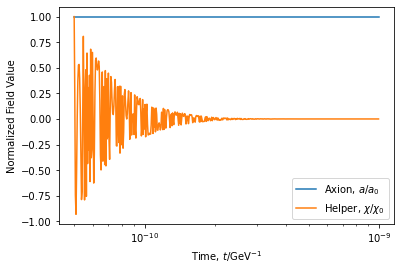

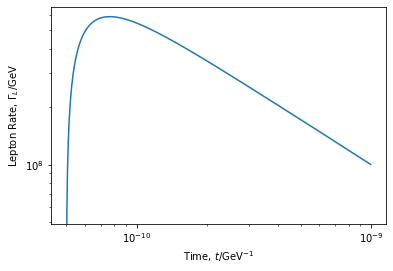

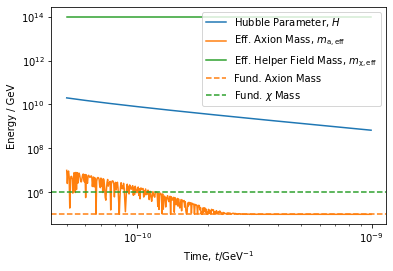

In [36]:
make_bg_plots(m_a=1e5, f_a=1e14, Gamma_phi=1e8, H_inf=2e10, chi0=1e7, m_chi=1e6, g=1.0, 
              converge=False, end=1e-9);

In [9]:
constraints.calc_H_inf_max(1e6)

600.0

In [ ]:
model.simulate_axion_d

In [58]:
m_a = 1e3;
f_a = 1e6;
Gamma_phi = 1e10
chi0 = 1e9
%time sol = model.simulate(m_a, f_a, Gamma_phi=Gamma_phi, chi0=chi0, H_inf=2e10, g=1.0, m_chi=1e3, fixed_samples=False)
%time sol2 = model.simulate_axion_decay(m_a, f_a, sol, fixed_samples=False)

CPU times: user 8.71 s, sys: 4 ms, total: 8.72 s
Wall time: 8.71 s
CPU times: user 9.75 ms, sys: 3 µs, total: 9.75 ms
Wall time: 9.63 ms


In [65]:
f_a = 1e6
m_chi = 1e6
m_a = 1e3 # this is irrelevant 
H_inf = 2e10
chi0_range = np.geomspace(5e5, 1e9, 10)
Gamma_phi_range = np.geomspace(5e5, 1e10, 10)
eta_B = np.array([[model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi) 
                    for chi0 in chi0_range] for Gamma_phi in tqdm(Gamma_phi_range)])

In [24]:
def minimal_axion_mass_from_decay(f_a):
    return 8e4 * (f_a / 1e15)**(2/3)

In [26]:
"%e" % minimal_axion_mass_from_decay(f_a)

'8.000000e-02'

In [61]:
def plot_eta_B_contour(eta_B, x_range, y_range,
                      xlabel=r"$\chi_0 / \mathrm{GeV}$", ylabel=r"$\Gamma_\phi / \mathrm{GeV}$",
                      title=None):
    vals = eta_B.reshape(-1)
    pows = np.log10(vals[np.isfinite(vals) & (vals > 0)])
    min_level = np.round(np.min(pows))
    max_level = np.round(np.max(pows))
    levels = np.sort(np.concatenate([np.arange(min_level, max_level + 1), [np.log10(constants.eta_B_observed)]]))

    CS2 = plt.contour(x_range, y_range, np.log10(eta_B), levels=levels)
    plt.colorbar().set_label(r"$\log_{10} \eta_B^0$")
    CS2.collections[np.where(CS2.levels == np.log10(model.eta_B_observed))[0][0]].set_color("red")

    plt.xscale("log"); plt.yscale("log")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.title(title)

<ipython-input-61-e8dcdf647d2f>:10: RuntimeWarning: invalid value encountered in log10
  CS2 = plt.contour(x_range, y_range, np.log10(eta_B), levels=levels)


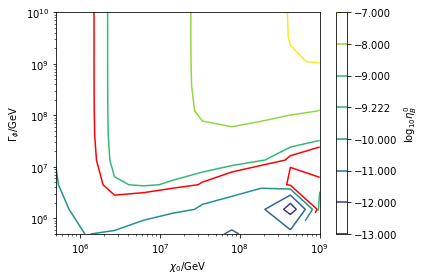

In [66]:
plot_eta_B_contour(eta_B, chi0_range, Gamma_phi_range)

In [69]:
cosmology.calc_start_time(constraints.calc_H_inf_max(f_a)) 

0.0016666666666666668

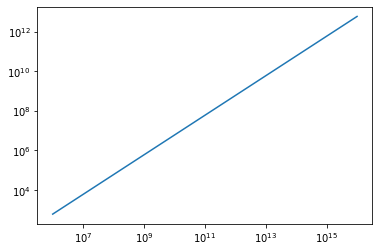

In [99]:
f_a_range = np.geomspace(1e6, 1e16, 100)
plt.loglog(f_a_range, constraints.calc_H_inf_max(f_a_range))
cosmology.calc_ma

In [98]:
f_a = 1e6
chi0 = 1e8
Gamma_phi = 1e7
H_inf = constraints.calc_H_inf_max(f_a)
start = cosmology.calc_start_time(H_inf)
print("start =", start)
print("H_inf =", H_inf)
sol = make_bg_plots(m_a=1e3, f_a=f_a, Gamma_phi=Gamma_phi, 
                H_inf=H_inf, chi0=chi0, m_chi=1e3, g=1.0,
                converge=False, end=start*10)

start = 0.0016666666666666668
H_inf = 600.0


KeyboardInterrupt: 

In [69]:
min_val = 5e5
m_chi = 1e3
m_a = 1e3
f_a_range = [1e5, 1e6, 1e7, 1e8]
eta_Bs = []
for f_a in f_a_range: # tqdm(f_a_range):
    H_inf = constraints.calc_H_inf_max(f_a)
    chi0_range = Gamma_phi_range = np.geomspace(min_val, H_inf, 10)
    eta_B = np.array([[model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi) 
                       for chi0 in chi0_range] for Gamma_phi in tqdm(Gamma_phi_range)])
    eta_Bs.append(eta_B)